In [58]:
import os
import pandas as pd
import torch

def load_resistor_data(data_dir):
    # 創建一個字典來保存所有電阻和電壓的數據
    data = {}
    
    # 遍歷每個電壓資料夾
    for voltage_folder in os.listdir(data_dir):
        voltage_path = os.path.join(data_dir, voltage_folder)
        if os.path.isdir(voltage_path):
            # 創建一個子字典來保存這個電壓下的所有電阻數據
            data[voltage_folder] = {}
            
            # 遍歷該電壓資料夾中的所有電阻文件
            for resistor_file in os.listdir(voltage_path):
                resistor_path = os.path.join(voltage_path, resistor_file)
                if resistor_file.endswith('.csv'):
                    # 讀取CSV文件到一個DataFrame中
                    resistor_data = pd.read_csv(resistor_path)
                    
                    # 將數據存入字典中
                    resistor_name = os.path.splitext(resistor_file)[0]  # 獲取文件名（去掉擴展名）
                    data[voltage_folder][resistor_name] = resistor_data
                    
    return data

# 假設數據位於 /data/ 目錄中
data_dir = 'C:\\Users\\walter\\OneDrive\\桌面\\收集\\2024大數據競賽\\2024-pre-train'
resistor_data = load_resistor_data(data_dir)

# 查看讀取的數據結構
for voltage, resistors in resistor_data.items():
    print(f"Voltage: {voltage}")
    for resistor, df in resistors.items():
        print(f"  Resistor: {resistor}, Data shape: {df.shape}")

#print(resistor_data['1']['a'])
import numpy as np

def split_data_for_training(resistor_data):
    train_inputs = []
    train_outputs = []
    
    # 遍歷每個電壓資料夾
    for voltage, resistors in resistor_data.items():
        for resistor, df in resistors.items():
            # 檢查數據是否有足夠的行數
            if len(df) >= 4000:
                # 前50筆數據作為輸入
                input_data = df.iloc[:3950].values  # 使用 .values 轉換為 numpy 數組
                # 後3950筆數據作為輸出
                output_data = df.iloc[3950:4000].values
                
                train_inputs.append(input_data)
                train_outputs.append(output_data)
    
    # 將結果轉換為 numpy 數組，方便後續使用
    train_inputs = np.array(train_inputs)
    train_outputs = np.array(train_outputs)
    
    return train_inputs, train_outputs

# 分割數據
train_inputs, train_outputs = split_data_for_training(resistor_data)

# 查看數據形狀
print(f"Train inputs shape: {train_inputs.shape}")
print(f"Train outputs shape: {train_outputs.shape}")



Voltage: 1
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 10
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 11
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 12
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 13
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 2
  Resistor: a, Data shape: (4000, 11)
  Resistor: b, Data shape: (4000, 11)
  Resistor: c, Data shape: (4000, 11)
  Resistor: d, Data shape: (4000, 11)
Voltage: 3
  Resis

In [59]:

print(f"test target output: {resistor_data['13']['a'].iloc[:50, 1]}")



test target output: 0     442
1     440
2     436
3     432
4     429
5     425
6     421
7     417
8     414
9     411
10    408
11    404
12    401
13    397
14    394
15    391
16    388
17    385
18    381
19    378
20    375
21    372
22    369
23    366
24    363
25    360
26    357
27    354
28    351
29    348
30    345
31    342
32    339
33    337
34    334
35    331
36    328
37    326
38    324
39    321
40    319
41    316
42    314
43    311
44    309
45    307
46    304
47    302
48    300
49    297
Name: y01, dtype: int64


# 模型
##### 子模型1

In [60]:
import torch
import torch.nn as nn

class ResistancePredictor(nn.Module):
    def __init__(self):
        super(ResistancePredictor, self).__init__()
        # 全連接層，用於將輸入轉換為單一電阻值
        self.fc1 = nn.Linear(50*11 , 1)
        self.fc2=nn.Linear(13*4*11,1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x=torch.relu(x)
        #resistance = (self.fc2(x))
        return x


##### 子模型2

In [61]:

import d2l
def get_lstm_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device)*0.01

    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                d2l.zeros(num_hiddens, device=device))

    W_xi, W_hi, b_i = three()  # 输入门参数
    W_xf, W_hf, b_f = three()  # 遗忘门参数
    W_xo, W_ho, b_o = three()  # 输出门参数
    W_xc, W_hc, b_c = three()  # 候选记忆元参数
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = d2l.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc,
              b_c, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

def lstm(inputs, state, params):
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c,
     W_hq, b_q] = params
    (H, C) = state
    outputs = []
    for X in inputs:
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_tilda
        H = O * torch.tanh(C)
        Y = (H @ W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H, C)


##### 合併

In [62]:
device = torch.device("cuda:0")

class LstmRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
 
    def __init__(self, input_size, hidden_size, output_size, num_layers,dropout_rate):
        super().__init__()
 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,dropout=dropout_rate)  # utilize the LSTM model in torch.nn
        self.linear1 = nn.Linear(40*hidden_size+1, output_size) # 全连接层
        self.dropout = nn.Dropout(p=dropout_rate)

 
    def forward(self, _x,resistance,j):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = x[:, -1, :]  # 取LSTM最後一個時間步的輸出，形狀為 (batch_size, hidden_size)
        #print("x",x.shape)
        x = x.flatten()  # 或者使用 res.flatten()
        #print("x",x.shape)

        x = torch.cat((x, resistance), dim=0)
        one_hot_tensor = torch.zeros(10)

        # 将第 j-1 个位置的值设置为 1 (因为索引从 0 开始)
        one_hot_tensor[j - 1] = 1
        #x = torch.cat((x, one_hot_tensor.to(device)))  
              
        x=self.dropout(x)

        x = self.linear1(x)
        return x



In [63]:
device = torch.device("cuda:0")

def create_sequences(data, sequence_length):
    xs, ys = [], []
    #print("data len",len(data))
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        #print("in x",x)
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)


class CompleteModel(nn.Module):
    def __init__(self):
        super(CompleteModel, self).__init__()
        self.resistance_predictor = ResistancePredictor()
        """
        :param vocab_size: 词典长度
        :param pkernel_size: 池化层kernel宽度
        :param embedding_dim: 词向量维度
        :param kernel_size: 卷积池kernel宽度
        :param hidden_dim: LSTM神经元的个数
        :param layer_dim: LSTM层数
        :param output_dim: 隐藏层的输出维度（分类的数量）
        """
        self.vocab_size=50
        self.embedding_dim=40
        self.kernel_size=2
        self.pkernel_size=2
        self.embedding = nn.Embedding(self.vocab_size,self.embedding_dim)

        self.conv = nn.Sequential(
                nn.Conv1d(in_channels=self.embedding_dim,
                          out_channels=self.embedding_dim,
                          kernel_size=self.kernel_size),
                nn.BatchNorm1d(self.embedding_dim),
                nn.ReLU(inplace=True),
                nn.MaxPool1d(kernel_size=(self.pkernel_size))
        )
                        
        self.timeLong = 50
        # 定义LSTM超参数
        input_size = 1   # 输入特征维度
        hidden_size = 1  # 隐藏单元数量
        num_layers = 1    # LSTM层数
        output_size = 50   # 输出类别数量
        dropout_rate=0.1

        self.sequence_length = 10


        self.lstm = LstmRNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,output_size=output_size,dropout_rate=dropout_rate)
    
    def forward(self, bcd_input, target_input,j,mode = 'train'):

        if mode == 'train':
            resistance = self.resistance_predictor(bcd_input)

            # 确保输出张量初始化时在正确的设备上
            output = torch.empty(4000)

            for i in range(0,3950,25):
                
                temp = target_input[i:i+self.timeLong]
                x,y=create_sequences(data=temp,sequence_length=self.sequence_length)
                #print("x shape",x.shape)

                ## embeds shape (batch,sent_long,embedding_dim)

                x = x.view(1, 40, 10)  # (batch_size=1, sequence_length=5, input_size=50)
                #x = x.permute(0, 2, 1)

                #print("x shape",x.shape)

               
                ## embeds shape (batch,embedding_dim,sent_long)
                conved = self.conv(x)
                #conved torch.Size([1, 40, 4])
                #print("conved",conved.shape)

                ## conved shape (batch,embedding_dim,(sent_long-kernel_size+1)/pkernel_size)
                conved = conved.permute(1, 2, 0)
                ## embeds shape (batch,embedding_dim,sent_long)
                #print("conved shape",conved.shape)
                ## 这里lstmcell的输入维度要调整为embedding_dim，文本在时间上展开成一个个embedding向量，这样才是把文本作为序列信息处理
                res = self.lstm(_x=conved,resistance=resistance,j=j)

                
                #print("res ",res)
                res = res.view(-1)  # 或者使用 res.flatten()
                res_temp=res[25:]
                # 将结果拼接到 data 中

                if i == 50:
                    output[i+self.timeLong:i+self.timeLong+25] = res[:25]

                elif i == 3975:
                    output[i+self.timeLong:i+self.timeLong+25] = res[25:]
                else:
                    output[i+self.timeLong:i+self.timeLong+25] = (res[:25]+res_temp)/2

            
            
            output = output.to(device)
            #print("output shape",output.shape)
            return output[50:]
        
        elif mode == 'test':
            resistance = self.resistance_predictor(bcd_input)
            
            for i in range(50, 4000, 25):
                temp = target_input[-self.timeLong:]
                x,y=create_sequences(data=temp,sequence_length=self.sequence_length)
                ## embeds shape (batch,sent_long,embedding_dim)

                x = x.view(1, 40, 10)  # (batch_size=1, sequence_length=5, input_size=50)



                ## embeds shape (batch,embedding_dim,sent_long)
                conved = self.conv(x)
                #conved torch.Size([1, 10, 4])
                #print("conved",conved)

                ## conved shape (batch,embedding_dim,(sent_long-kernel_size+1)/pkernel_size)
                conved = conved.permute(1, 2, 0)
                #print("conved",conved)

                ## conved shape (batch,embedding_dim,(sent_long-kernel_size+1)/pkernel_size)
                #print("conved shape",conved.shape)
                ## 这里lstmcell的输入维度要调整为embedding_dim，文本在时间上展开成一个个embedding向量，这样才是把文本作为序列信息处理
                res= self.lstm(_x=conved,resistance=resistance,j=j)

                res = res.view(-1)  # 或者使用 res.flatten()
                res_temp=res[:25]
                if i == 50:
                    target_input = torch.cat((target_input, res[:25]), dim=0)
                elif i == 3975:
                    target_input = torch.cat((target_input, res[25:]), dim=0)
                else:
                    target_input = torch.cat((target_input, (res[:25] + res_temp) / 2), dim=0)
            #print("target_input shape",target_input.shape)

            #print("target_input shape",target_input.shape)

            return target_input[50:]

        '''
        for i in range(79):

            temp = target_input[-self.timeLong:]
            #print('temp size',temp.size())
            # 将 resistance_predictor 拼接到 temp 中
            
            # 通过 resmodel 模型预测
            res = self.res(temp)
            #print('temp',temp)
            # 将结果拼接到 data 中
            target_input = torch.cat((target_input, res), dim=0)
        return target_input[50:]
        '''

# 訓練

In [65]:
import torch.optim as optim
from torch.nn import init
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import time



type='a'
# 建立模型
model = CompleteModel()
device = torch.device("cuda:0")

# 初始化网络参数
for params in model.parameters():
    init.normal_(params, mean=0, std=0.01)

print(model)
# 定義損失函數和優化器
criterion = nn.MSELoss()

#optimizer = optim.Adam(model.parameters(), lr=1)
optimizer = optim.SGD(model.parameters(), lr=50, momentum=0.9)


# 假設有訓練數據 train_bcd_input, train_target_input, train_target_output

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

num_epochs=1000
# 使用一個簡單的訓練迴圈
all_train_loss=[]
all_test_loss=[]
model=model.to(device)
torch.cuda.empty_cache()

for epoch in range(num_epochs):  # 假設訓練100個epoch
    start=time.time()

    model.train()
    trl=[]
    for voltage in range(1, 13):     
        voltage = str(voltage)  # 將數字轉換為字串
    
        input_1=resistor_data[voltage][type].iloc[:50].to_numpy().flatten()
        input_1=torch.from_numpy(input_1).float()
        input_1 = input_1.to(device)

        for j in range(0,11):

            input_2=resistor_data[voltage][type].iloc[:,j].to_numpy()
            input_2=torch.from_numpy(input_2).float()
            input_2 = input_2.to(device)

            target_out=resistor_data[voltage][type].iloc[50:,j].to_numpy()
            target_out=torch.from_numpy(target_out).float()
            target_out = target_out.to(device)


            optimizer.zero_grad()
            
            # 前向傳播
            outputs = model(input_1, input_2,mode='train',j=j)
            # 計算損失
            # 调试输出形状
            #print(f"Epoch {epoch}, Voltage {voltage}, Iter {j}")
            #print(f"outputs shape: {outputs.shape}, target_out shape: {target_out.shape}")

            # 确保形状匹配
            if outputs.shape != target_out.shape:
                raise ValueError(f"Shape mismatch: outputs shape {outputs.shape}, target_out shape {target_out.shape}")

            # 计算损失
            loss = torch.sqrt(criterion(outputs, target_out))

            # 调试输出 `grad_fn`
            #print(f"outputs grad_fn: {outputs.grad_fn}")



            # 反向傳播和優化
            loss.backward()
            optimizer.step()
            trl.append(loss.item())

            
    all_train_loss.append(np.mean(trl))
    scheduler.step(np.mean(trl))

    #test
    tel=[]
    test_input_1=resistor_data['13'][type].iloc[:50].to_numpy().flatten()
    test_input_1=torch.from_numpy(test_input_1).float()
    test_input_1 = test_input_1.to(device)

    for j in range(1,11):
        test_input_2=resistor_data['13'][type].iloc[:50,j].to_numpy()
        test_input_2=torch.from_numpy(test_input_2).float()
        test_input_2 = test_input_2.to(device)


        test_output=model(test_input_1,test_input_2,mode='test',j=j)
        
        test_target_out=resistor_data['13'][type].iloc[50:,j].to_numpy()
        test_target_out=torch.from_numpy(test_target_out).float()
        test_target_out = test_target_out.to(device)


        test_loss = torch.sqrt(criterion(test_output, test_target_out))
        tel.append(test_loss.item())
    all_test_loss.append(np.mean(tel))

    
    
    print(f'Epoch {epoch}, Loss: {np.mean(trl)},test loss: {np.mean(tel)}')
    print('time',time.time()-start,'sec','net par')

#print("all_train_loss",all_train_loss)
x=np.linspace(start=0,stop=num_epochs,num=len(all_train_loss))
#print("x",x)

plt.plot(x,all_train_loss, 'r:')
plt.plot(x,all_test_loss, 'b:')
plt.legend(['train loss','test loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')          # log y-axis

plt.show()  

    
print('outputs',outputs)
torch.cuda.empty_cache()


'''
timeLong=50
for epoch in range(10000):
    all_outputs=train_target_input
    temp = train_target_input[-timeLong:]

    for i in range(3950):
        temp = temp[-timeLong:]
        optimizer.zero_grad()

        #print('temp size',temp.size())
        # 前向傳播
        outputs = model(temp)
        
        # 計算損失
        #print('outputs',outputs.size())
        #print('train_target_output[i]',train_target_output[i].size())
        train_target_output_num = torch.tensor([train_target_output[i].item()])

        loss = torch.sqrt(criterion(outputs, train_target_output_num))
        
        # 反向傳播和優化
        loss.backward()
        optimizer.step()
        temp = torch.cat((temp, outputs), dim=0)
        all_outputs = torch.cat((all_outputs, outputs), dim=0)


    # 計算損失
    #print('all_outputs size',all_outputs[50:].size())
    #print("train_target_output",train_target_output.size())
    all_loss = torch.sqrt(criterion(all_outputs[50:], train_target_output))
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, all_Loss: {all_loss.item()}')

print('outputs',all_outputs[50:])
'''


CompleteModel(
  (resistance_predictor): ResistancePredictor(
    (fc1): Linear(in_features=550, out_features=1, bias=True)
    (fc2): Linear(in_features=572, out_features=1, bias=True)
  )
  (embedding): Embedding(50, 40)
  (conv): Sequential(
    (0): Conv1d(40, 40, kernel_size=(2,), stride=(1,))
    (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LstmRNN(
    (lstm): LSTM(1, 1, dropout=0.1)
    (linear1): Linear(in_features=41, out_features=50, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
Epoch 0, Loss: 41069761.2441209,test loss: 32.22248916625976
time 52.5857789516449 sec net par
Epoch 1, Loss: 319.5638944596955,test loss: 40.9498348236084
time 58.23632788658142 sec net par
Epoch 2, Loss: 319.44219050262916,test loss: 50.31002960205078
time 57.89992833137512 sec net par
Epoch 3, Loss: 319.3372721672058,t

KeyboardInterrupt: 

CompleteModel(
  (resistance_predictor): ResistancePredictor(
    (fc1): Linear(in_features=550, out_features=1, bias=True)
    (fc2): Linear(in_features=572, out_features=1, bias=True)
  )
  (embedding): Embedding(50, 40)
  (conv): Sequential(
    (0): Conv1d(40, 40, kernel_size=(2,), stride=(1,))
    (1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LstmRNN(
    (lstm): LSTM(1, 5, num_layers=2, dropout=0.2)
    (linear1): Linear(in_features=201, out_features=50, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)


  0%|          | 0/1000 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-10


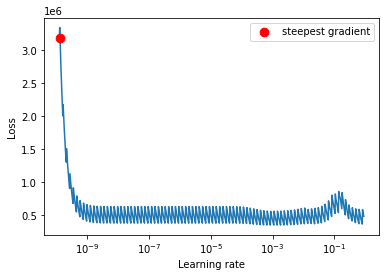

In [ ]:


import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.nn import init
from torch_lr_finder import LRFinder


class ResistorDataset(Dataset):
    def __init__(self, resistor_data, voltages, type):
        self.resistor_data = resistor_data
        self.voltages = voltages
        self.type = type

    def __len__(self):
        return len(self.voltages) * 11  # 每个电压有11个input_2

    def __getitem__(self, idx):
        voltage_idx = idx // 11  # 计算电压索引
        j = idx % 11  # 计算 j 索引

        voltage = str(self.voltages[voltage_idx])
        input_1 = self.resistor_data[voltage][self.type].iloc[:50].to_numpy().flatten()
        input_2 = self.resistor_data[voltage][self.type].iloc[:, j].to_numpy()
        target_input = self.resistor_data[voltage][self.type].iloc[50:, j].to_numpy()

        input_1 = torch.from_numpy(input_1).float()
        input_2 = torch.from_numpy(input_2).float()
        target_input = torch.from_numpy(target_input).float()

        #print("input_2",input_2)
        return input_1, input_2,j,target_input

from torch_lr_finder import LRFinder

from torch_lr_finder import LRFinder

class CustomLRFinder(LRFinder):
    def _move_to_device(self, tensor, non_blocking=True):
        return tensor.to(self.device, non_blocking=non_blocking)
    
    def _train_batch(self, train_iter, accumulation_steps, non_blocking_transfer=True):
        self.model.train()
        total_loss = None

        self.optimizer.zero_grad()

        for i in range(accumulation_steps):
            try:
                inputs, target_input = next(train_iter)
            except StopIteration:
                return -1

            # 解包 inputs
            inputs1, inputs2,j = inputs
           
            inputs1=inputs1.view(-1)
            inputs2=inputs2.view(-1)
            j=j.view(-1)

            #print("inputs1 s",inputs1.shape)
            #print("inputs2 s",inputs2.shape)
            # 移動數據到設備上
            inputs1 = self._move_to_device(inputs1, non_blocking=non_blocking_transfer)
            inputs2 = self._move_to_device(inputs2, non_blocking=non_blocking_transfer)
            target_input = self._move_to_device(target_input, non_blocking=non_blocking_transfer)

            # 前向傳播
            outputs = self.model(inputs1, inputs2,j)
            loss = self.criterion(outputs, target_input)

            # 平均損失
            loss /= accumulation_steps

            # 反向傳播
            loss.backward()

            if total_loss is None:
                total_loss = loss.detach().item()
            else:
                total_loss += loss.detach().item()

        self.optimizer.step()

        return total_loss




       



# Initialize and wrap the model
model = CompleteModel()

# Define voltages and create dataset and dataloaders
voltages = list(range(1, 14))  # 从1到13的电压值
type = 'a'

train_dataset = ResistorDataset(resistor_data, voltages=voltages[:-1], type=type)  # 使用1-12的电压作为训练集
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
'''
for input_1, input_2,t in train_loader:
    print("input_1",input_1)
    print("input_2",input_2)
    print("t",t)
'''
test_dataset = ResistorDataset(resistor_data, voltages=[13], type=type)  # 使用13的电压作为测试集
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Initialize model parameters
device = torch.device("cuda:0")
print(model)
for params in model.parameters():
    #print(params)
    init.normal_(params, mean=0, std=0.01)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Use torch-lr-finder to find optimal learning rate
# 使用自定義的 LRFinder
class DataLoaderWrapper(torch.utils.data.DataLoader):
    def __iter__(self):
        for idx, batch in enumerate(super().__iter__()):
            # 構建符合 (inputs, targets) 結構的批次數據
            inputs = (batch[0], batch[1], batch[2])
            targets = batch[3]
            
            #print(f"DataLoaderWrapper output - Index: {idx}, Inputs Length: {len(inputs)}, Targets Shape: {targets.shape}")
            
            yield inputs, targets

lr_finder = CustomLRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(DataLoaderWrapper(test_dataset),start_lr=1e-10, end_lr=1, num_iter=1000)
#lr_finder.range_test(test_loader, end_lr=1, num_iter=100)
lr_finder.plot()  # 显示损失函数与学习率的关系图
lr_finder.reset()  # 重置模型和优化器到初始状态
